<a href="https://colab.research.google.com/github/salmanhiro/-BackyardHacks-Backyard-Painting/blob/master/%5BBackyard_hack%5D_Backyard_painting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# @title Let's Try!   { display-mode: "form" }
import tensorflow as tf
import tensorflow_hub as hub
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mp


import numpy as np
import PIL.Image
import time
import functools

mp.rcParams['figure.figsize'] = (15,15)
mp.rcParams['axes.grid'] = False
plt.rcParams['axes.grid'] = False

def tensor_convert(tensor):
  tensor = np.array(tensor*255, dtype=np.uint8)
  image = PIL.Image.fromarray(tensor[0])
  return image

def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  new_shape = tf.cast(shape, tf.int32)
  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

def imshow(image, title=None):
  image = tf.squeeze(image, axis=0)
  plt.imshow(image)
  plt.title(title)

def transfer():
  hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
  stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
  return stylized_image

In [0]:
# @title Load your images  { display-mode: "form" }

content_path =  "tf.keras.utils.get_file('ctn.jpg','https://upload.wikimedia.org/wikipedia/commons/c/c3/NGC_4414_%28NASA-med%29.jpg')"# @param {type:"string"}
style_path =  tf.keras.utils.get_file('stl.jpg','https://addons.cdn.mozilla.net/user-media/previews/full/215/215878.png') # @param {type:"string"}
output_image_size = 1024  # @param {type:"integer"}

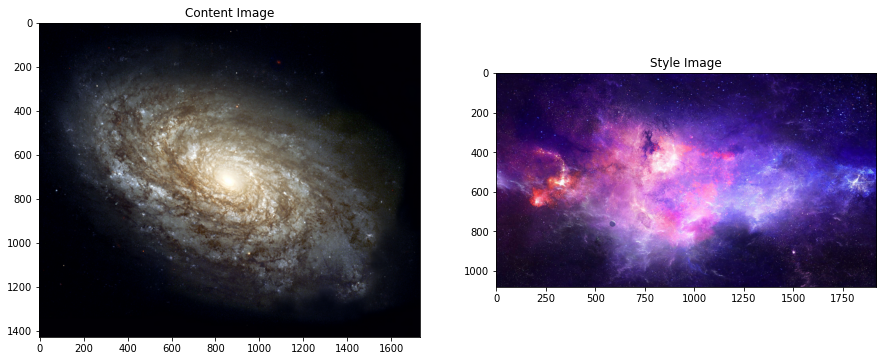

In [27]:
# @title Your Images Preview  { display-mode: "form" }

content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

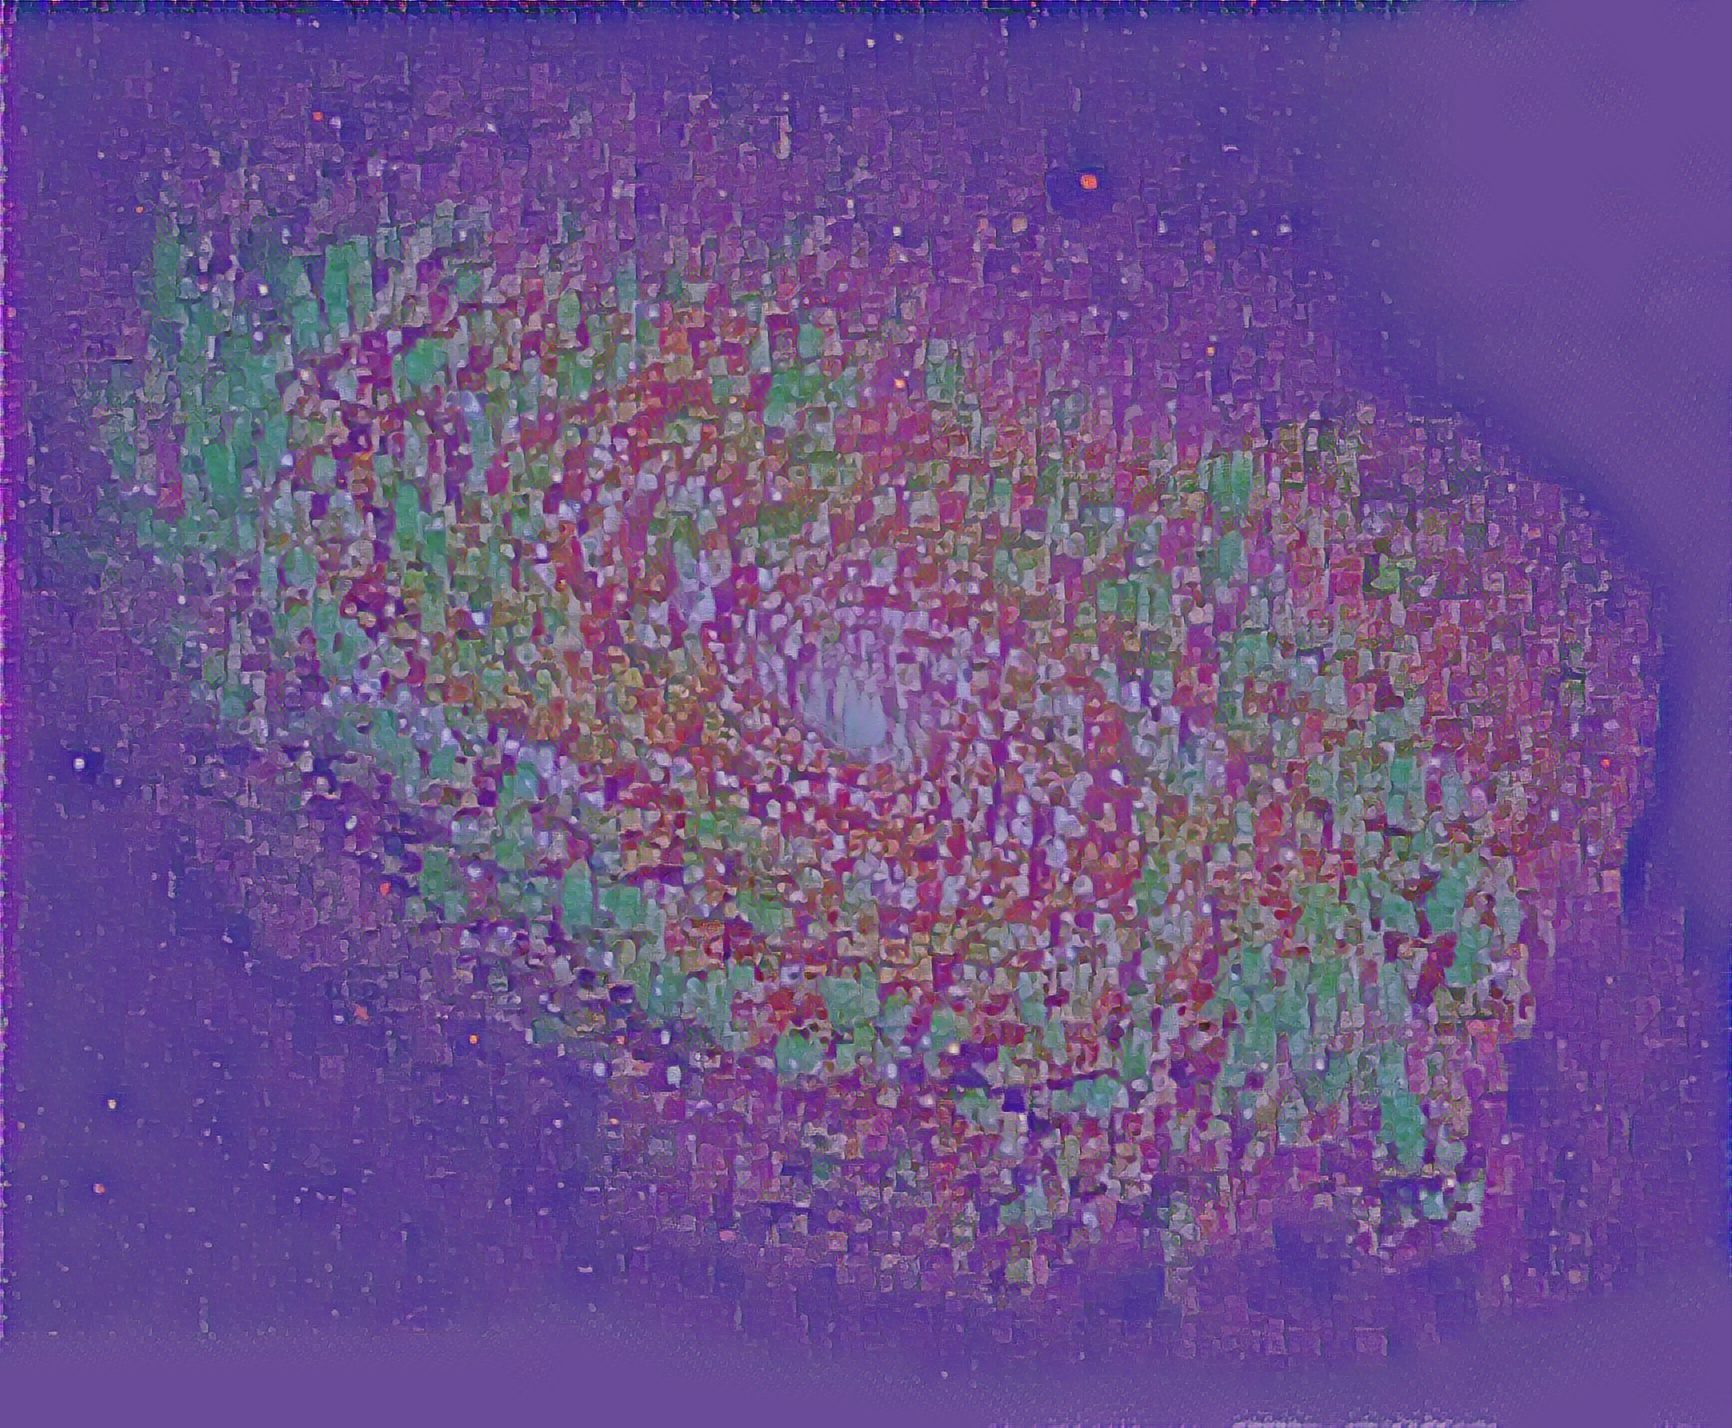

In [29]:
# @title Your painting is ready!  { display-mode: "form" }
tensor_convert(transfer())